In [0]:
# Education - Udacity "Intro to TensorFlow for Deep Learning"
# Module: Naive Forcasting
# REF: https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c02_naive_forecasting.ipynb

In [0]:
# Import packages.
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# Plot series.
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

# Create a linear trend.
def trend(time, slope=0):
  return slope * time

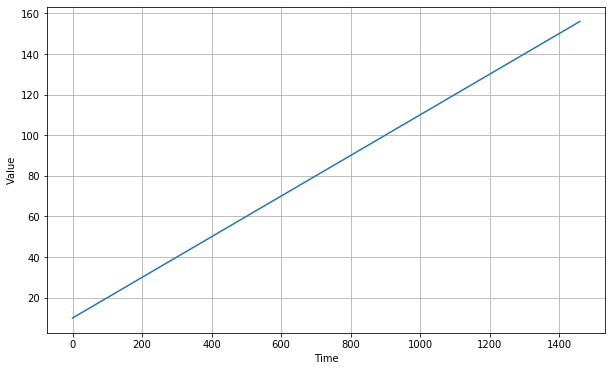

In [4]:
# Create a time series.
time      = np.arange(4 * 365 + 1)
baseline  = 10

# We add 0.1 every day.
series    = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [5]:
# Print time.
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [6]:
# Print series.
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [0]:
# Create time series with a seasonal pattern.
def seasonal_pattern(season_time):
  # Just an arbitrary pattern.
  return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  # Repeats the same pattern at each period.
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

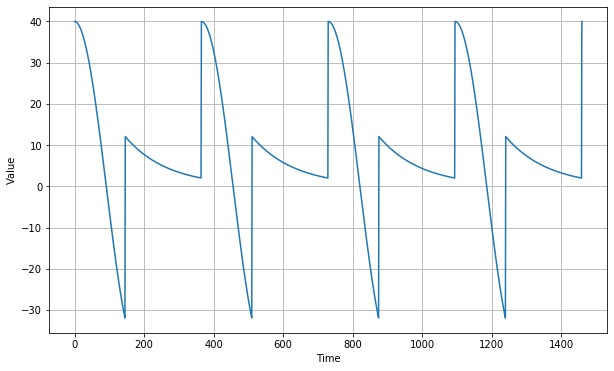

In [8]:
# Create the time series.
amplitude = 40
series    = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

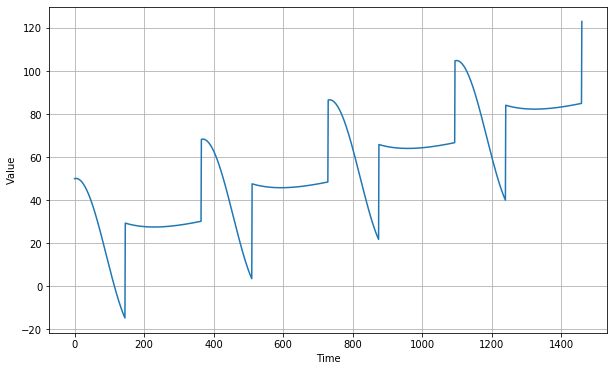

In [9]:
# Create trend and seasonality.
slope  = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [0]:
# Add noise function.
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

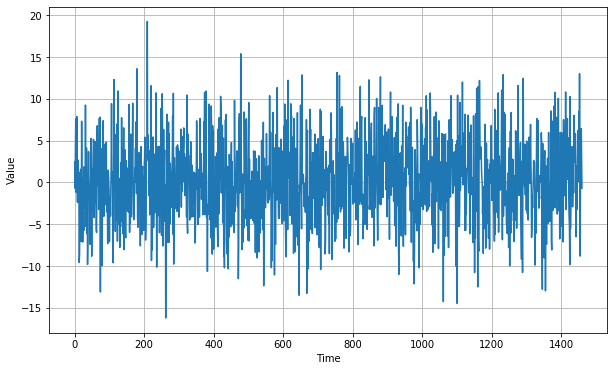

In [11]:
# Display noise.
noise_level = 5
noise       = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

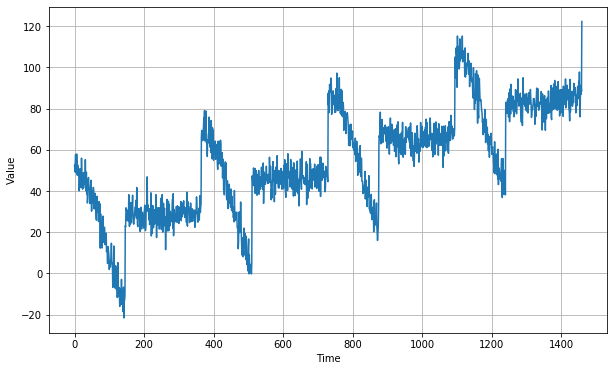

In [12]:
# Add noise into time series.
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [0]:
# ====================
# Naive Forcast
# ====================
# Naive Forcast is to predict the next value is the same as the previous one.

# We split the time series into training and validation data set.
# We use data uptil the split time for training
# and from split time for validation.
split_time        = 1000
time_train        = time[:split_time]
time_validation   = time[split_time:]
series_train      = series[:split_time]
series_validation = series[split_time:]

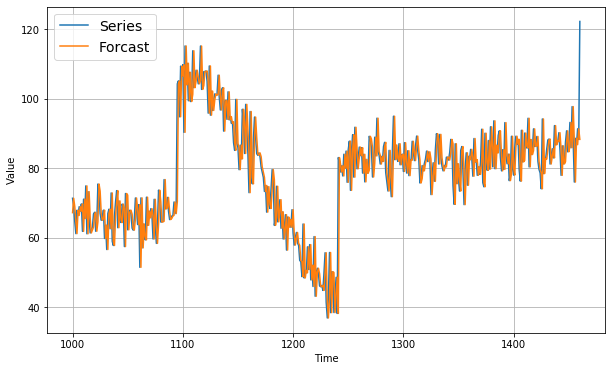

In [14]:
# Create Naive Forcast,
# using day "999" uptil "1459" (length of our timeline minus one day).
naive_forcast = series[split_time - 1 : -1]

plt.figure(figsize=(10, 6))
plot_series(time_validation, series_validation, label = "Series")
plot_series(time_validation, naive_forcast, label = "Forcast")

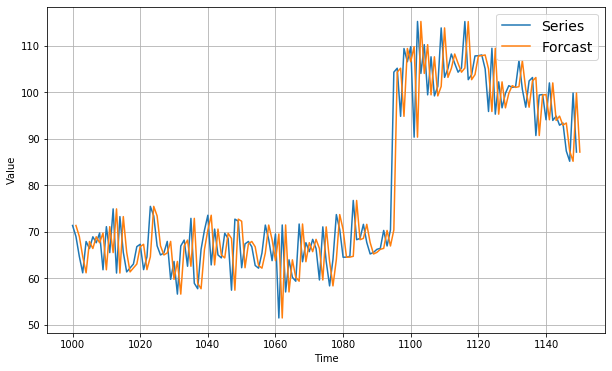

In [15]:
# Zoom on the plot, by shifting the forcast one day a head.
plt.figure(figsize=(10, 6))
plot_series(time_validation, series_validation, start = 0, end = 150, label = "Series")
plot_series(time_validation, naive_forcast, start = 1, end = 151, label = "Forcast")

In [16]:
# Compute metrics of to evaluate the forcast.
# Mean Square Error (MSE)
#   Common metric
# Mean Root Square Error (MRSE)
#   This gives us about the same scale of the time and series.
#   It would be easier to interpret.
# Mean Absolute Error (MAE)
#   Common metric
# Mean Absolute Percentage Error (MAPE)
#   Mean ratio between the absolute error and the absolute value.
#   This gives an idea of the size of the errors compared to the values.
#
# Prefer MSE if large errors are potentially dangerous and
# cost much more than smaller errors.
#
# Prefer MAE if gain or loss just proportional to the size of the error.

errors  = naive_forcast - series_validation
mae     = np.abs(errors).mean()
mape    = np.abs(errors / series_validation).mean()
mse     = np.square(errors).mean()

print("MAE  (Mean Absolute Error):            ", mae)
print("MAPE (Mean Absolute Percentage Error): ", mape)
print("MSE  (Mean Square Error):              ", mse)

MAE  (Mean Absolute Error):             5.9379085153216735
MAPE (Mean Absolute Percentage Error):  0.0784569876201399
MSE  (Mean Square Error):               61.82753366856369
